In [1]:
import pandas as pd 
import numpy as np

In [2]:
raw_csv_data = pd.read_csv("./data/IndexE8.csv")

In [3]:
df_comp = raw_csv_data.copy()

# Examining the Data

In [4]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [5]:
df_comp

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.900000,2224.95,3445.980000,18124.01
1,10/01/1994,475.270000,2225.00,3440.580000,18443.44
2,11/01/1994,474.130000,2228.10,3413.770000,18485.25
3,12/01/1994,474.170000,2182.06,3372.020000,18793.88
4,13/01/1994,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...,...
6264,23/01/2018,2839.130362,13559.60,7731.827774,24124.15
6265,24/01/2018,2837.544008,13414.74,7643.428966,23940.78
6266,25/01/2018,2839.253031,13298.36,7615.839954,23669.49
6267,26/01/2018,2872.867839,13340.17,7665.541292,23631.88


In [6]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [7]:
df_comp.isna()

,date,spx,dax,ftse,nikkei
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
6264,False,False,False,False,False
6265,False,False,False,False,False
6266,False,False,False,False,False
6267,False,False,False,False,False


In [8]:
df_comp.spx.isna().sum()

0

# Plotting the Data

In [9]:
import matplotlib.pyplot as plt

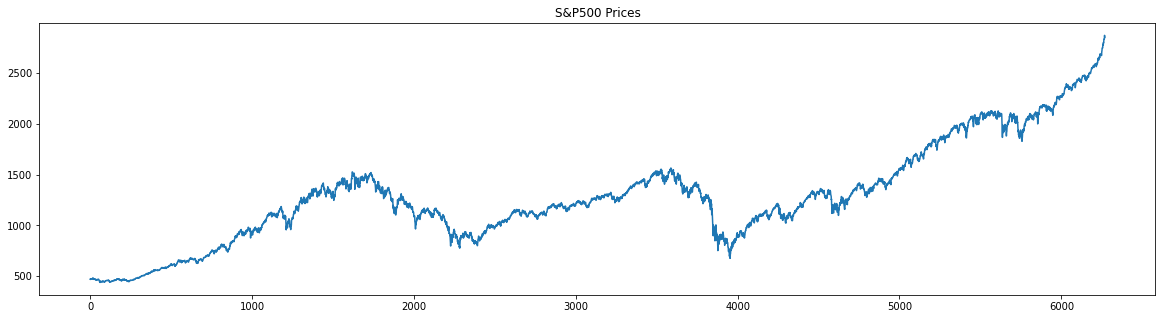

In [10]:
df_comp.spx.plot(figsize=(20,5), title = "S&P500 Prices")
plt.show()

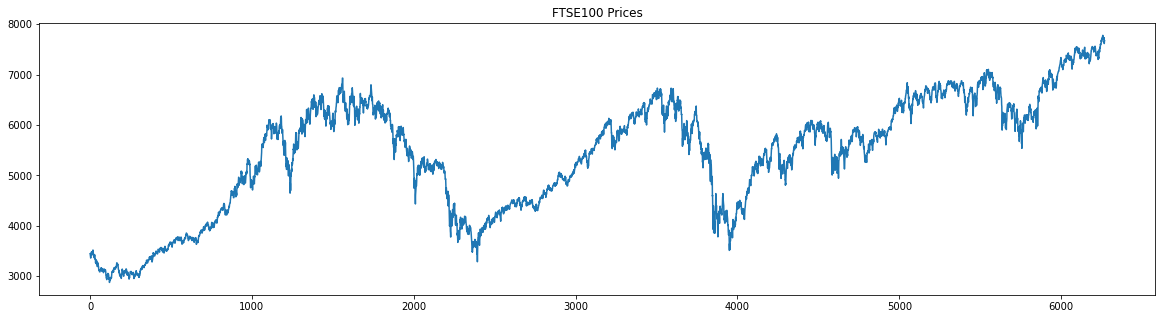

In [11]:
df_comp.ftse.plot(figsize=(20,5), title = "FTSE100 Prices")
plt.show()

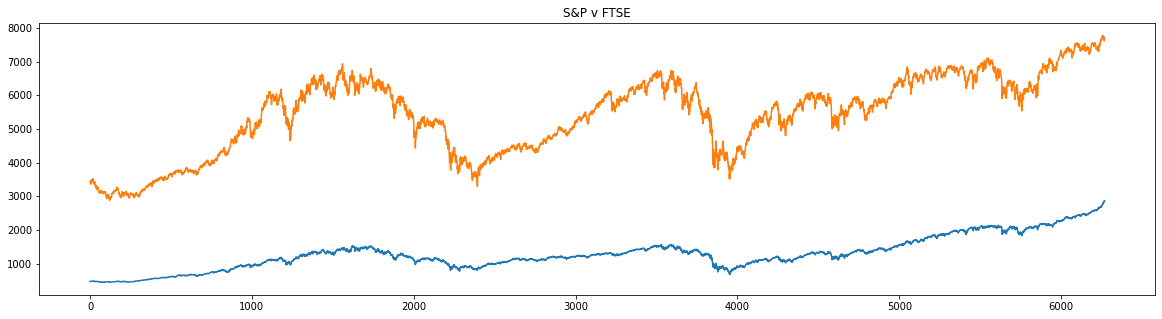

In [12]:
df_comp.spx.plot(figsize=(20,5), title = "S&P500 Prices")
df_comp.ftse.plot(figsize=(20,5), title = "FTSE100 Prices")
plt.title("S&P v FTSE")
plt.show()

### The QQ Plot

In [13]:
import scipy.stats
import pylab

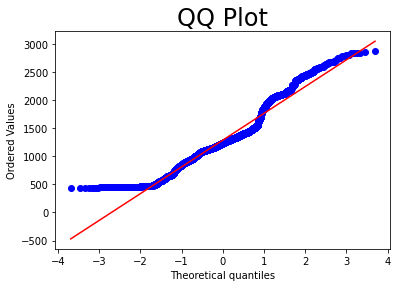

In [14]:
scipy.stats.probplot(df_comp.spx, plot = pylab)
plt.title("QQ Plot", size = 24)
pylab.show()

# From Tex to Date

In [15]:
pd.to_datetime(df_comp.date, dayfirst=True)

0      1994-01-07
1      1994-01-10
2      1994-01-11
3      1994-01-12
4      1994-01-13
          ...    
6264   2018-01-23
6265   2018-01-24
6266   2018-01-25
6267   2018-01-26
6268   2018-01-29
Name: date, Length: 6269, dtype: datetime64[ns]

In [16]:
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [17]:
df_comp.date.describe(datetime_is_numeric=True)

count                             6269
mean     2006-01-14 19:36:59.492742144
min                1994-01-07 00:00:00
25%                2000-01-11 00:00:00
50%                2006-01-12 00:00:00
75%                2012-01-19 00:00:00
max                2018-01-29 00:00:00
Name: date, dtype: object

# Setting the Index

In [18]:
df_comp.set_index("date", inplace=True)

In [19]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


# Setting the Desired Frequency

In [20]:
# d = Day
# b = business days
df_comp = df_comp.asfreq('b')

In [21]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


# Handling Missing Values

In [22]:
df_comp.isna()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,False,False,False,False
1994-01-10,False,False,False,False
1994-01-11,False,False,False,False
1994-01-12,False,False,False,False
1994-01-13,False,False,False,False
...,...,...,...,...
2018-01-23,False,False,False,False
2018-01-24,False,False,False,False
2018-01-25,False,False,False,False


In [23]:
df_comp.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [24]:
df_comp.spx = df_comp.spx.fillna(method="ffill")

In [25]:
df_comp.isna().sum()

spx       0
dax       8
ftse      8
nikkei    8
dtype: int64

In [26]:
df_comp.ftse = df_comp.ftse.fillna(method="bfill")

In [27]:
df_comp.isna().sum()

spx       0
dax       8
ftse      0
nikkei    8
dtype: int64

In [29]:
df_comp.dax = df_comp.dax.fillna(value=df_comp.dax.mean())

In [30]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

In [32]:
df_comp['market_value'] = df_comp.spx

In [33]:
df_comp.describe()

,spx,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6269.000000,6277.000000
mean,1288.642547,6080.063363,5423.690398,14597.055700,1288.642547
std,487.868210,2752.604984,1145.568370,4043.122953,487.868210
min,438.920000,1911.700000,2876.600000,7054.980000,438.920000
25%,992.715221,4070.460000,4487.880000,10709.290000,992.715221
50%,1233.761241,5774.380000,5663.300000,15028.170000,1233.761241
75%,1460.250000,7442.660000,6304.630175,17860.470000,1460.250000
max,2872.867839,13559.600000,7778.637689,24124.150000,2872.867839


In [34]:
del df_comp['spx']

In [35]:
df_comp.describe()

,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6269.000000,6277.000000
mean,6080.063363,5423.690398,14597.055700,1288.642547
std,2752.604984,1145.568370,4043.122953,487.868210
min,1911.700000,2876.600000,7054.980000,438.920000
25%,4070.460000,4487.880000,10709.290000,992.715221
50%,5774.380000,5663.300000,15028.170000,1233.761241
75%,7442.660000,6304.630175,17860.470000,1460.250000
max,13559.600000,7778.637689,24124.150000,2872.867839


In [37]:
del df_comp['dax'], df_comp['ftse'], df_comp['nikkei']

In [38]:
df_comp.describe()

,market_value
count,6277.000000
mean,1288.642547
std,487.868210
min,438.920000
25%,992.715221
50%,1233.761241
75%,1460.250000
max,2872.867839


# Splitting the Data

In [39]:
size = int(len(df_comp)*0.8)

In [40]:
df = df_comp.iloc[:size]

In [41]:
df_test = df_comp.iloc[size:]

In [42]:
df.tail()

,market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [43]:
df.head()

,market_value
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47
